#### Binary Classification 

In [263]:
import pandas as pd

df = pd.read_csv('./data/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


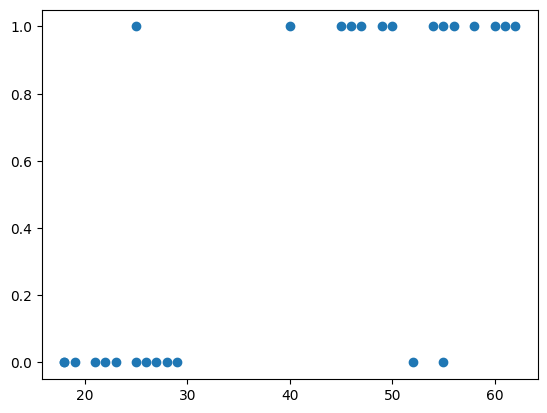

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['age'],df['bought_insurance'])

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df[['age']], df['bought_insurance'], test_size=0.3)

In [266]:
print(df.shape)
print(X_train.size, X_test.size, Y_train.size, Y_test.size)

(27, 2)
18 9 18 9


In [267]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, Y_train)

LogisticRegression()

In [268]:
reg.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [269]:
reg.score(X_test,Y_test) 

0.8888888888888888

In [270]:
reg.predict_proba(X_test)

array([[0.19512236, 0.80487764],
       [0.92976256, 0.07023744],
       [0.55097312, 0.44902688],
       [0.29390196, 0.70609804],
       [0.12372496, 0.87627504],
       [0.90539958, 0.09460042],
       [0.81786314, 0.18213686],
       [0.11247257, 0.88752743],
       [0.41679305, 0.58320695]])

#### Multiclass Classification 

In [271]:
from sklearn.datasets import load_digits
digits = load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [272]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<Figure size 640x480 with 0 Axes>

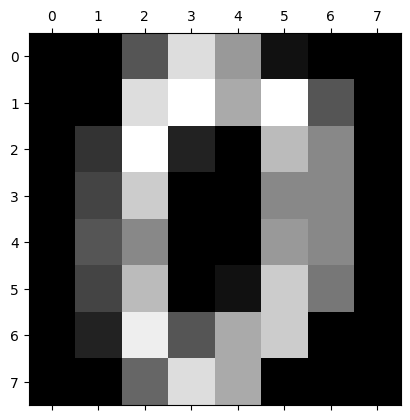

In [273]:
plt.gray()
plt.matshow(digits.images[0])

In [274]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [275]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [276]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, Y_train)

c:\Users\Pratham\Desktop\ml\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [277]:
reg.score(X_test, Y_test)

0.9722222222222222

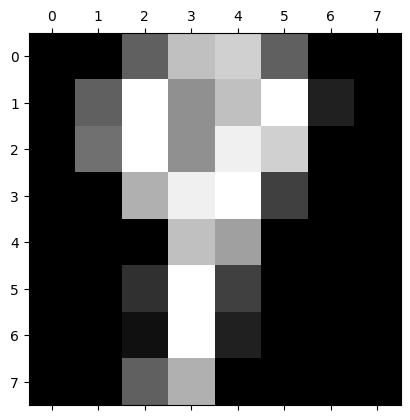

In [279]:
plt.matshow(digits.images[69])

In [283]:
digits.target[69]

9

In [282]:
reg.predict([digits.data[69]])

array([9])

#### Confusion Matrix

In [284]:
Y_predicted = reg.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 64,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 58,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 45,  1],
       [ 0,  0,  0,  1,  1,  2,  0,  1,  1, 43]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

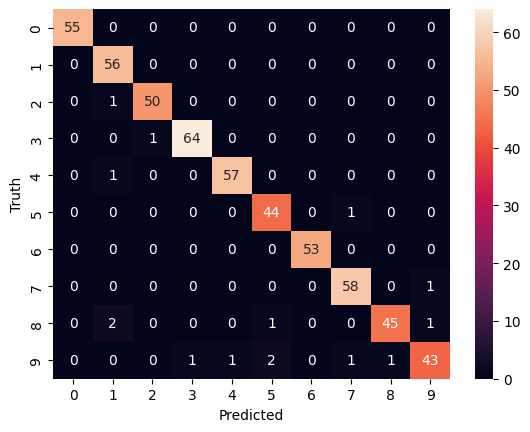

In [292]:
import seaborn as sn

sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')